# Import Library

In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00


In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
from numpy import nan
from numpy import inf
from scipy import stats
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, VarianceThreshold, chi2, f_classif, SequentialFeatureSelector,RFECV,RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part1(Static Model)

## Data Analysis

In [4]:
# read our data
static_df = pd.read_csv("/content/drive/MyDrive/AI_For_CS_Assignment3/Static_dataset.csv")
static_df.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [5]:
static_df.shape

(268074, 16)

In [6]:
static_df.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [7]:
static_df.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


In [8]:
static_df.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [9]:
static_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [10]:
static_df.nunique()

timestamp           35924
FQDN_count             34
subdomain_length       24
upper                   5
lower                  34
numeric                13
entropy               630
special                 8
labels                  7
labels_max             31
labels_average         73
longest_word         6224
sld                 11112
len                    32
subdomain               2
Target Attack           2
dtype: int64

check using plots and statistical tools the distribution of each feature and the target variable

In [11]:
def visualize_TargetColumn(df):
    # Count the number of cases for each class
    class_counts = df.value_counts()
    class_labels = class_counts.index.tolist()
    class_values = class_counts.tolist()

    pastel_palette = sns.color_palette('Pastel2', n_colors=7)
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot the bar chart on the first subplot (axes[0])
    bars = axes[0].bar(class_labels, class_values, color=pastel_palette)
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width() / 2, height, str(height),
                    ha='center', va='bottom', fontweight='bold', fontsize=12)

    axes[0].set_title('Number of Cases in Each Class')
    axes[0].set_xlabel('Class Labels')
    axes[0].set_ylabel('Count')


    # Create a pie chart on the second subplot (axes[1])
    axes[1].pie(class_values, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=pastel_palette,
                wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    axes[1].set_title('Percentage of Cases in Each Class')
    axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()


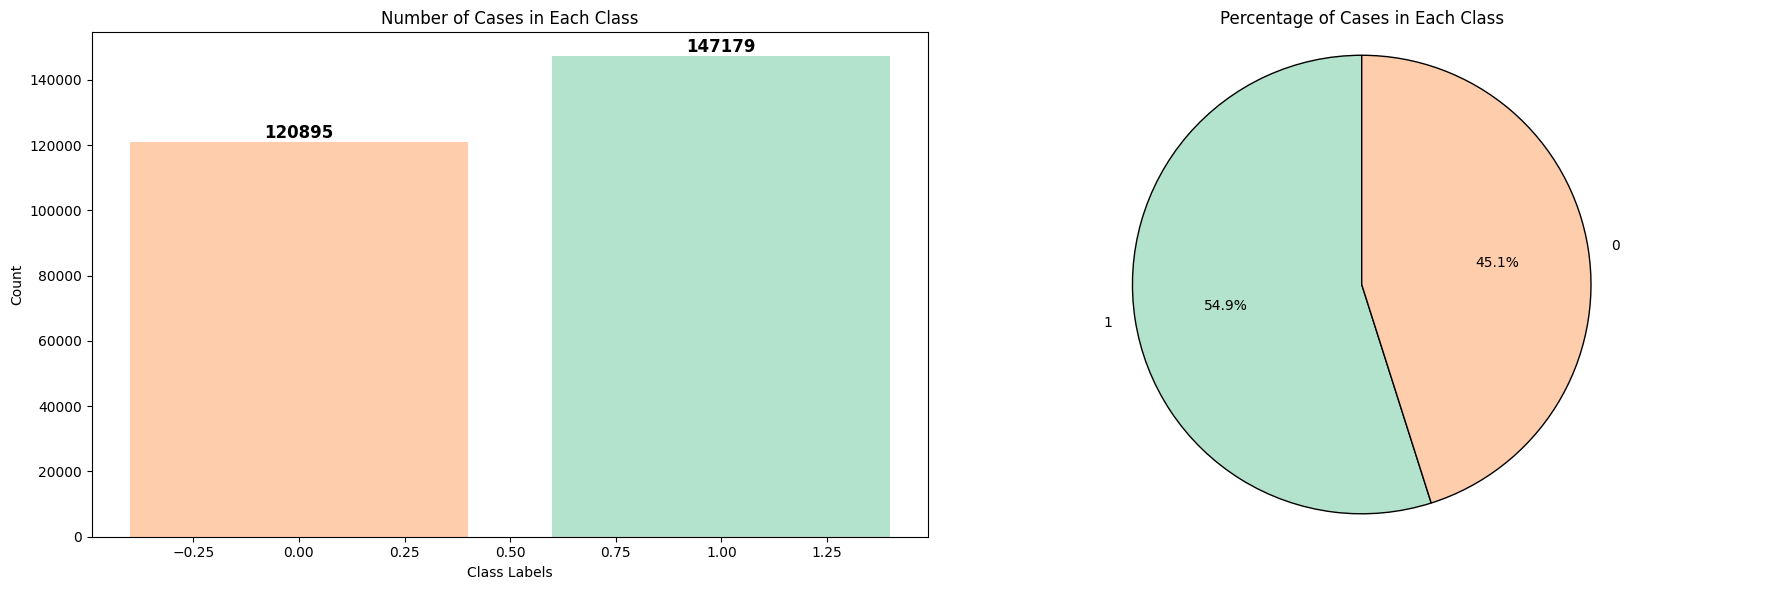

In [12]:
visualize_TargetColumn(static_df['Target Attack'])

the distribution of each feature

<Figure size 1500x1000 with 0 Axes>

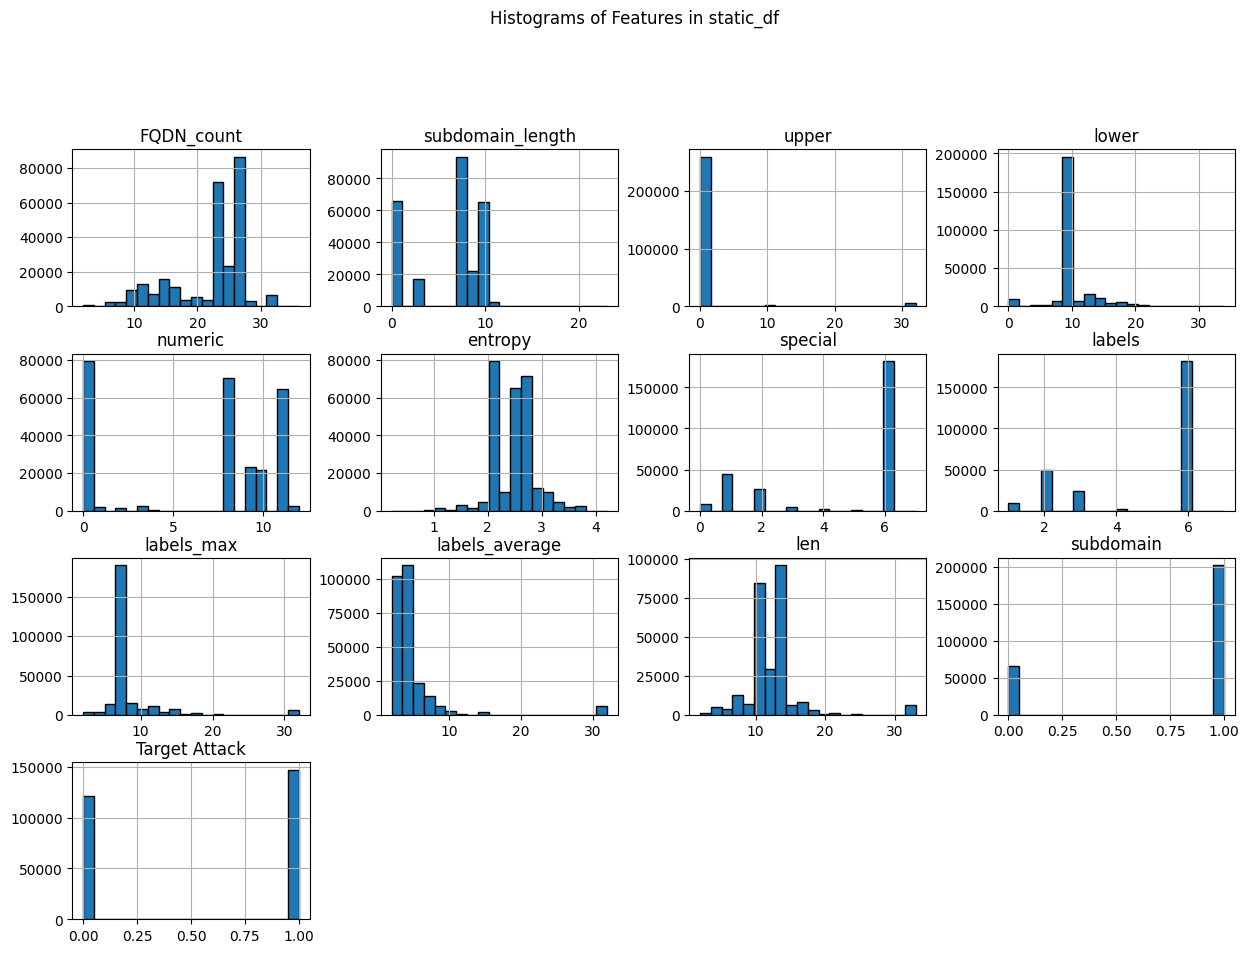

In [13]:
# Plot histograms for every column in a single graph
plt.figure(figsize=(15, 10))
static_df.hist(figsize=(15,10), bins=20, edgecolor='black')

# Set labels and title
plt.suptitle('Histograms of Features in static_df', y=1.02)
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

check data skewed

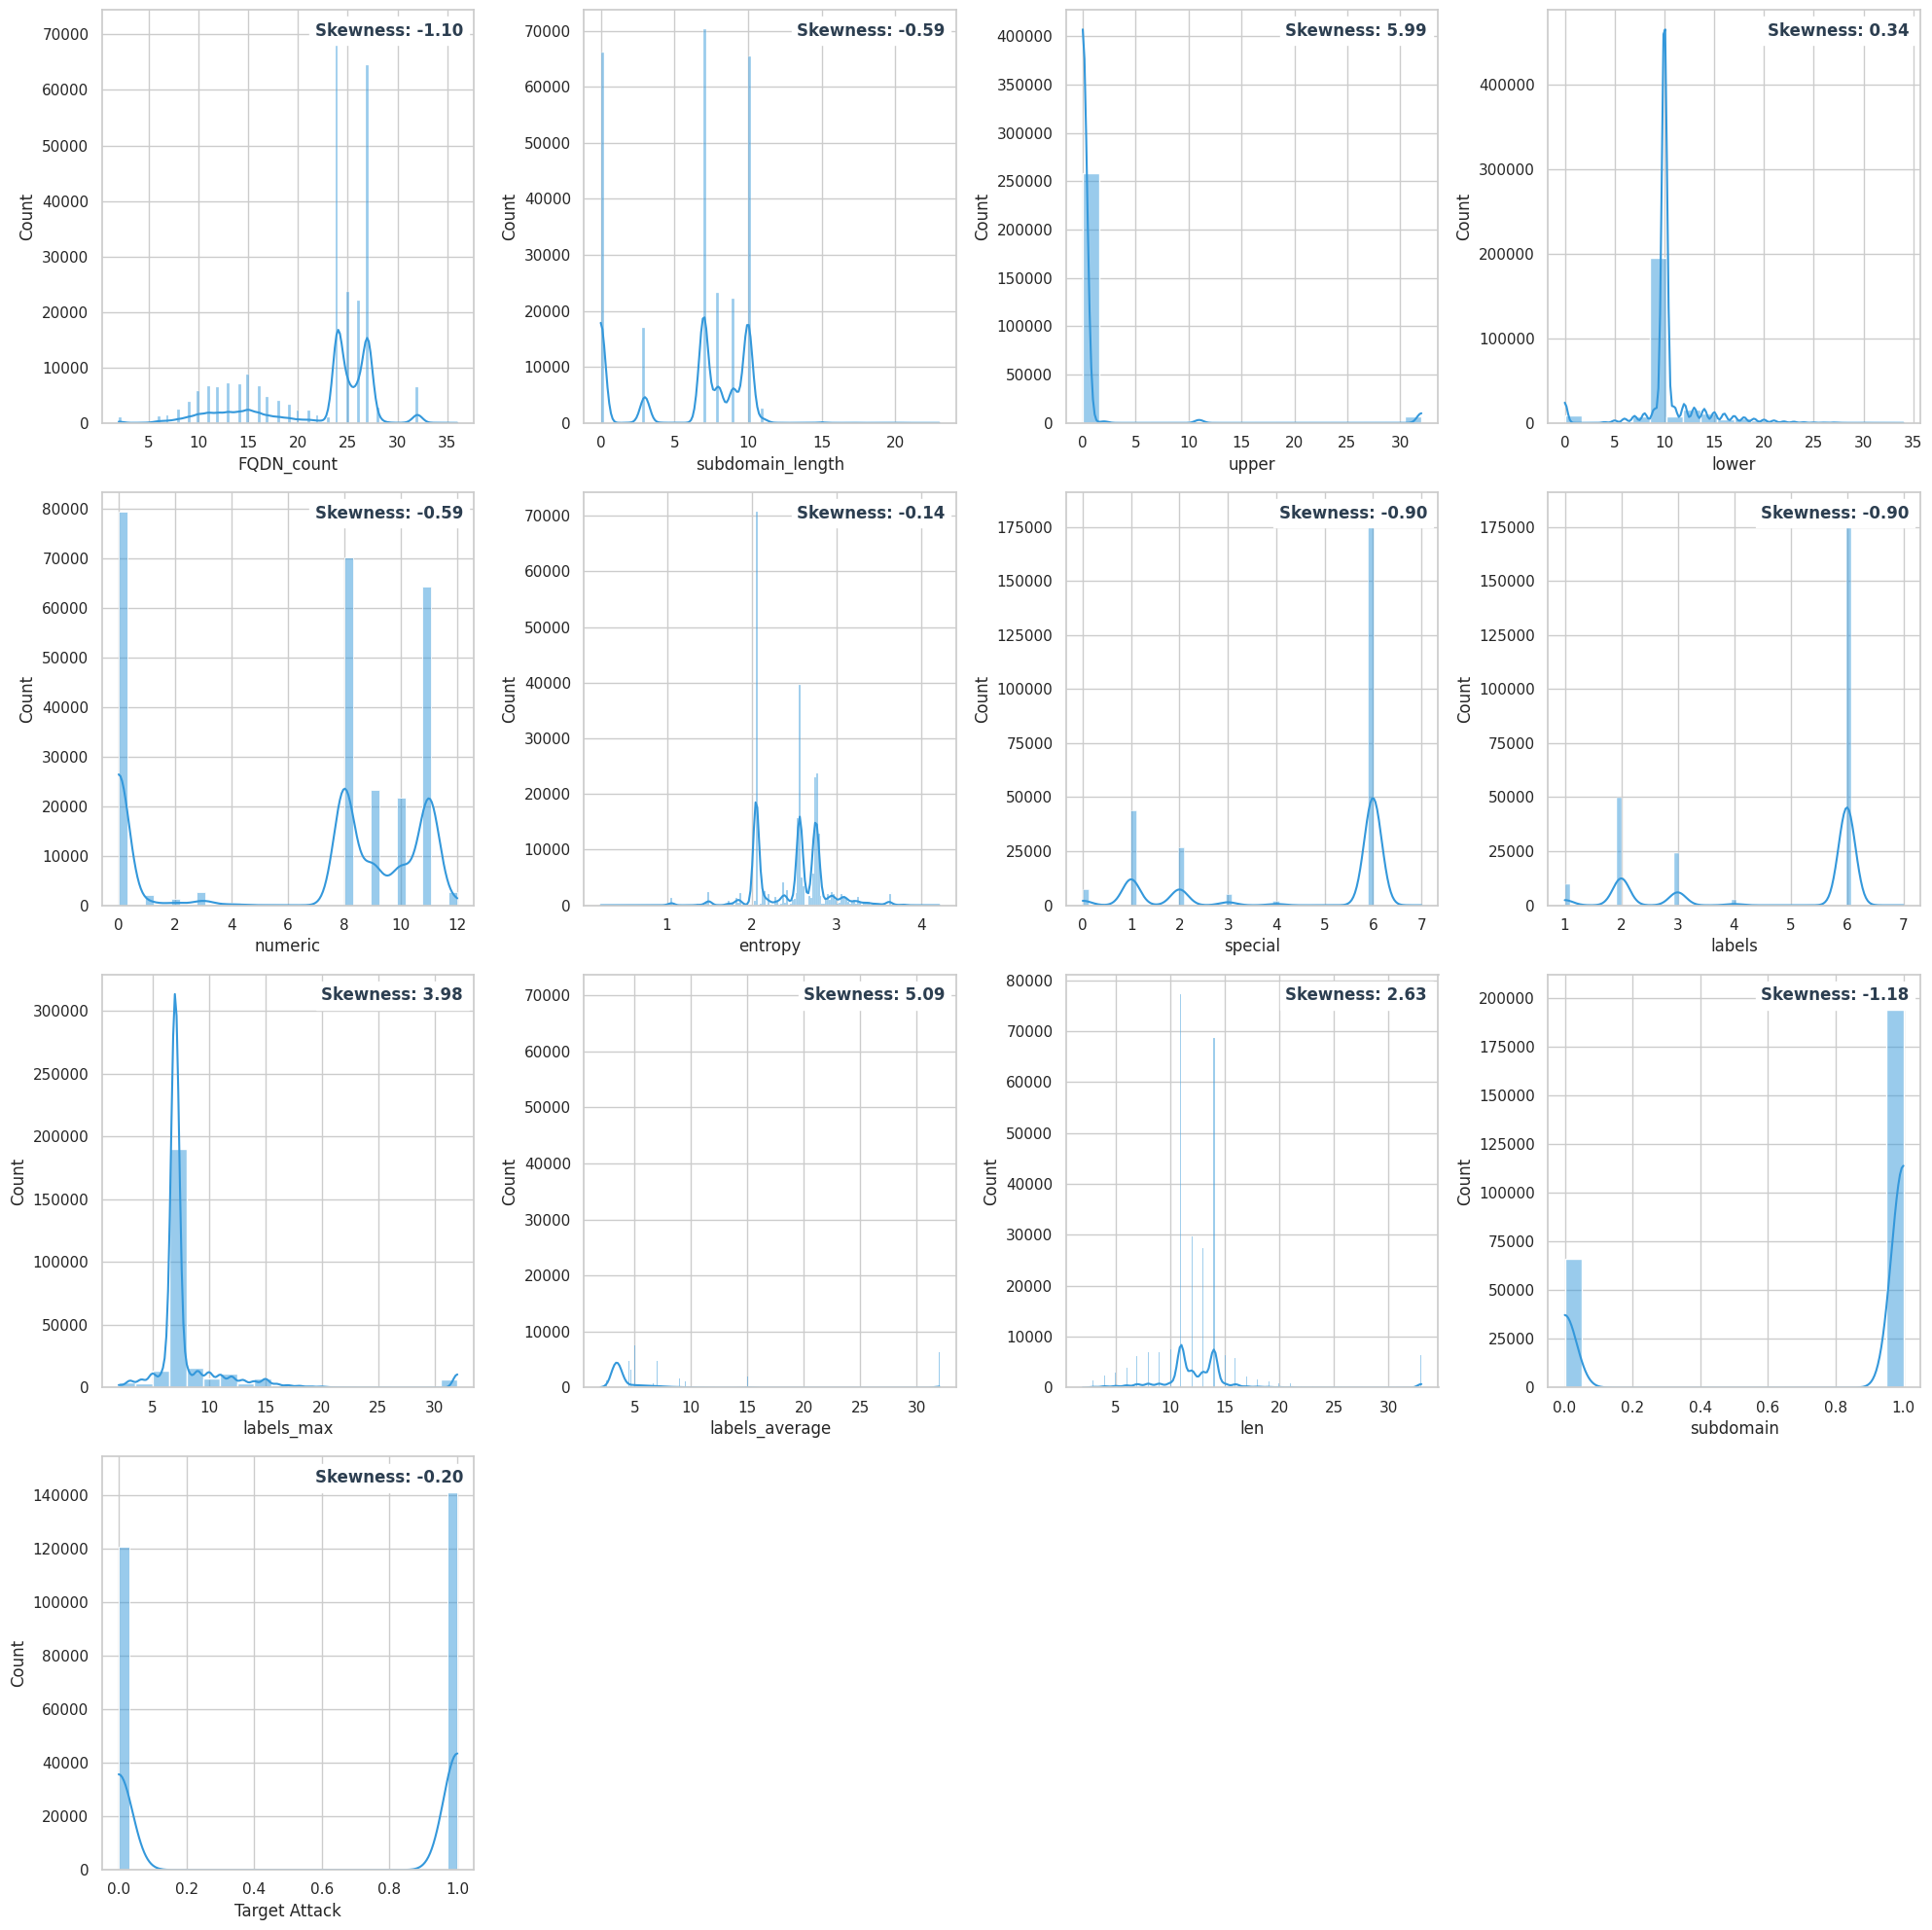

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

numeric_columns = static_df.select_dtypes(include=['number']).columns
num_cols = 4
num_rows = -(-len(numeric_columns) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20), sharex=False)

for i, column in enumerate(numeric_columns):
    row, col = divmod(i, num_cols)

    # Use Seaborn histplot for a more visually appealing plot
    sns.histplot(static_df[column], ax=axes[row, col], color='#3498db', kde=True)

    skewness = static_df[column].skew()

    # Improved text placement and styling
    axes[row, col].text(
        x=0.97, y=0.97, transform=axes[row, col].transAxes,
        s=f'Skewness: {skewness:.2f}',
        fontweight='bold', fontsize=12, verticalalignment='top',
        horizontalalignment='right', backgroundcolor='white',
        color='#2c3e50'
    )

# Remove empty subplots
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.ravel()[i])

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


Box plots of numerical features

In [15]:
numerical_cols = static_df.select_dtypes(['float64','uint8', 'int64' ]).columns.tolist()
categorical_cols = static_df.select_dtypes(['object']).columns.tolist()
print(numerical_cols)
print(categorical_cols)

['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'len', 'subdomain', 'Target Attack']
['timestamp', 'longest_word', 'sld']


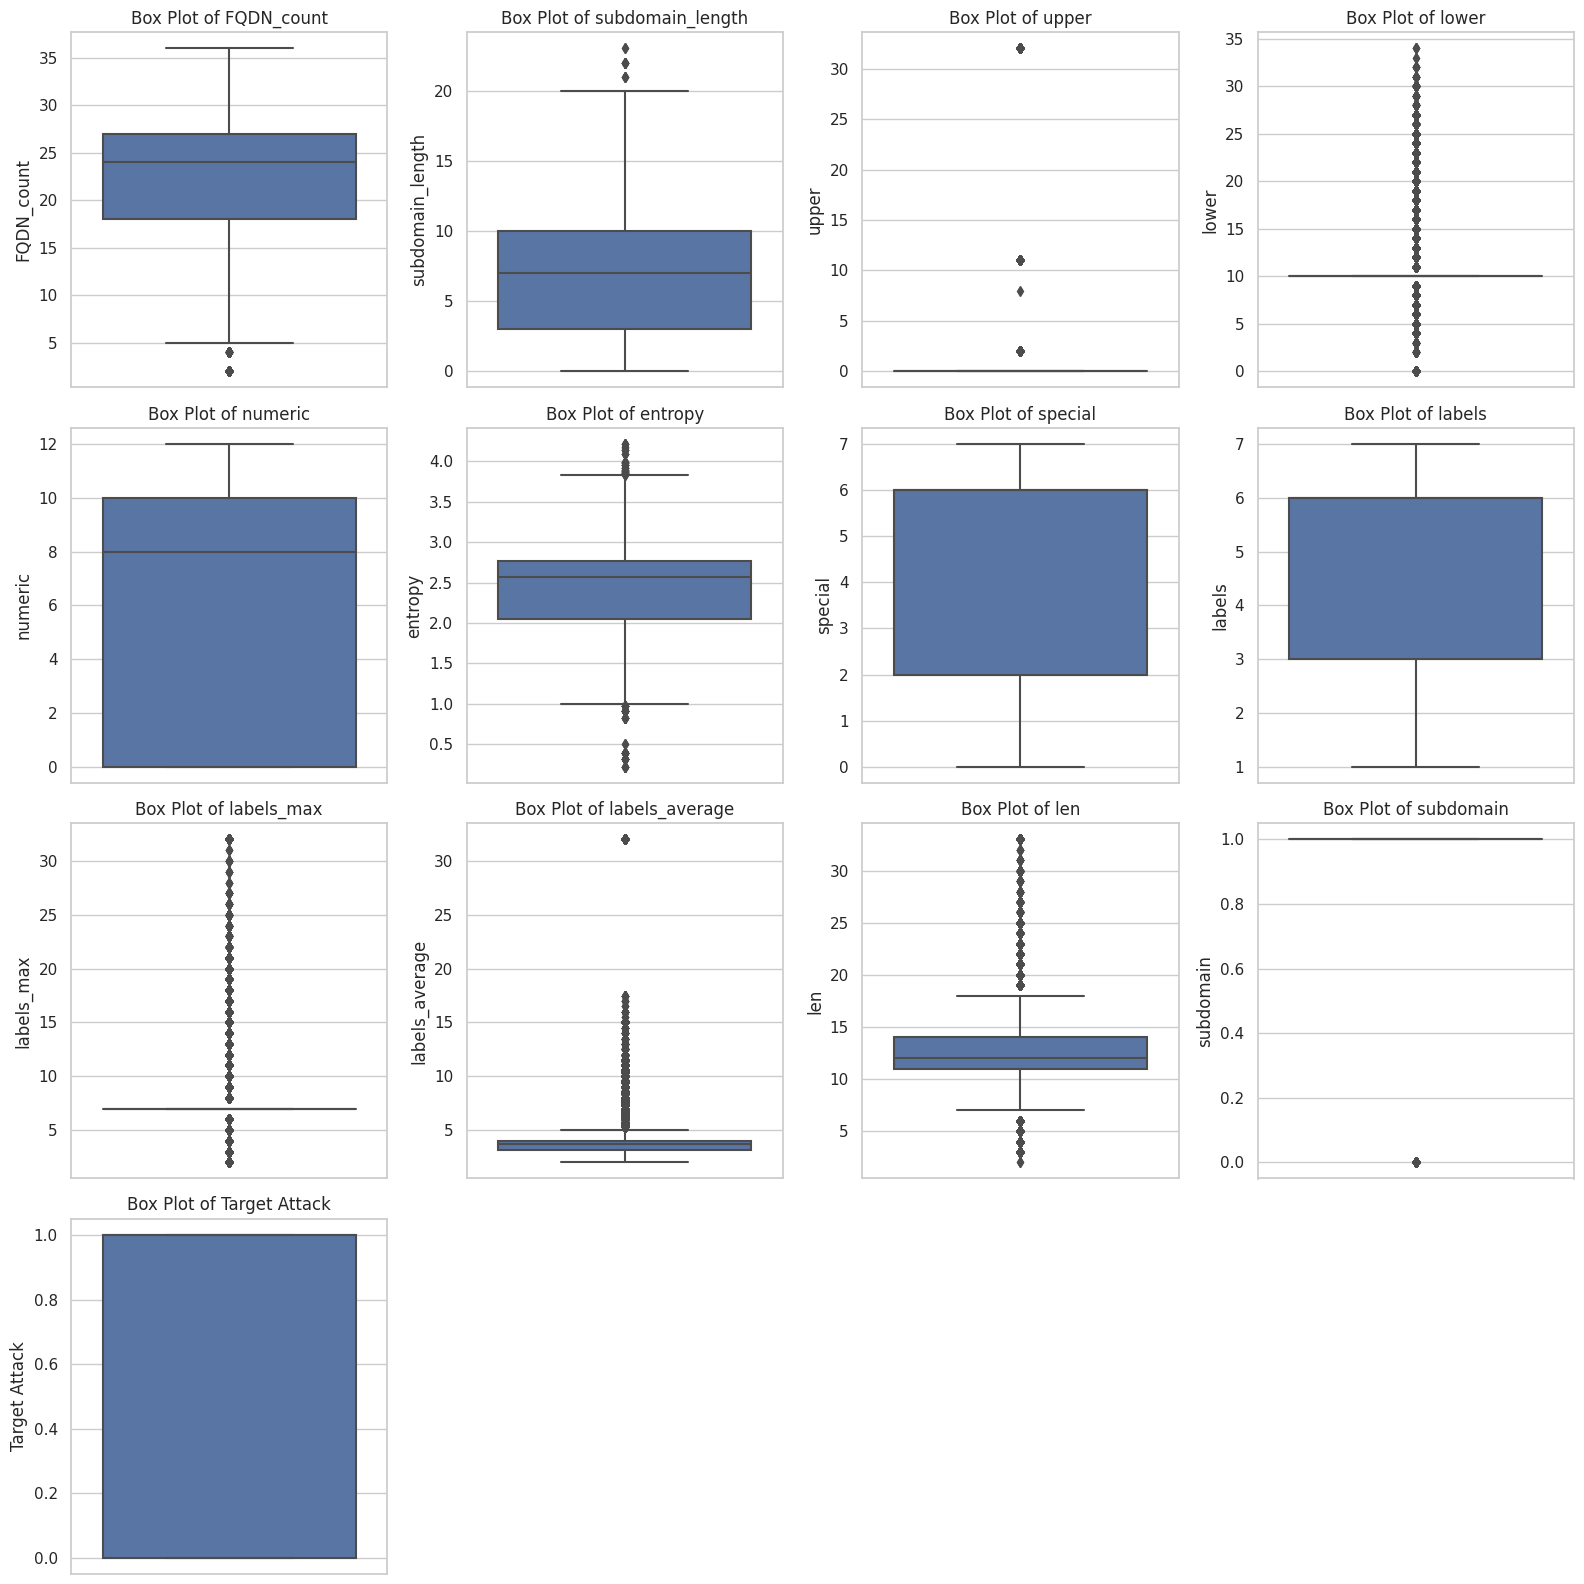

In [16]:
# Create boxplots for each numerical feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i, col in enumerate(numerical_cols):
    row = i // 4
    col_index = i % 4
    ax = axes[row, col_index]
    sns.boxplot(data=static_df, y=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')
    ax.set_ylabel(col)

# Remove any empty subplots
for i in range(len(numerical_cols), 4 * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


## Feature engineering and data cleaning

Step 1: Check Missing and NAN Values

In [17]:
print(static_df.shape)

(268074, 16)


In [18]:
static_df.dropna(inplace=True)

In [19]:
print(static_df.shape)

(268066, 16)


In [20]:
# Check for missing values
missing_values = static_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64


Step 2: Encode Categorical Variables

In [21]:
print(static_df["sld"].value_counts())

192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
                                     ...  
bukkit                                   1
pc-builds                                1
yaarlnk                                  1
onenote                                  1
queue-it                                 1
Name: sld, Length: 11110, dtype: int64


In [22]:
print(static_df["sld"].nunique())

11110


In [23]:
print(static_df["longest_word"].value_counts())

2          109981
4           70188
N            4498
C            2969
9            1906
            ...  
yaa             1
queue           1
kit             1
airdrop         1
mal             1
Name: longest_word, Length: 6224, dtype: int64


In [24]:
print(static_df["longest_word"].nunique())

6224


In [25]:
le = LabelEncoder()
static_df["longest_word"] = le.fit_transform(static_df["longest_word"])

static_df["sld"] = le.fit_transform(static_df["sld"])

In [26]:
print(static_df["longest_word"].value_counts())

2       109981
4        70188
14        4498
11        2969
9         1906
         ...  
6118         1
4443         1
2860         1
133          1
3250         1
Name: longest_word, Length: 6224, dtype: int64


In [27]:
print(static_df["longest_word"].nunique())

6224


In [28]:
print(static_df["sld"].value_counts())

35       109517
57        70188
166        4498
160        1961
60         1906
          ...  
1406          1
7299          1
10911         1
7038          1
7848          1
Name: sld, Length: 11110, dtype: int64


In [29]:
print(static_df["sld"].nunique())

11110


In [30]:
print("NUM OF Duplicate ",static_df.duplicated().sum())

NUM OF Duplicate  91803


In [31]:
# Dropping duplicates
static_df=static_df.drop_duplicates()

# Displaying the DataFrame after dropping duplicates
print("DataFrame after removing duplicates:",static_df.duplicated().sum())

DataFrame after removing duplicates: 0


In [32]:
#Drop Time Stamp column
static_df = static_df.drop("timestamp", axis=1)

## Feature Filtering/Selection

In [33]:
X = static_df.drop(columns=['Target Attack'])
y = static_df['Target Attack']

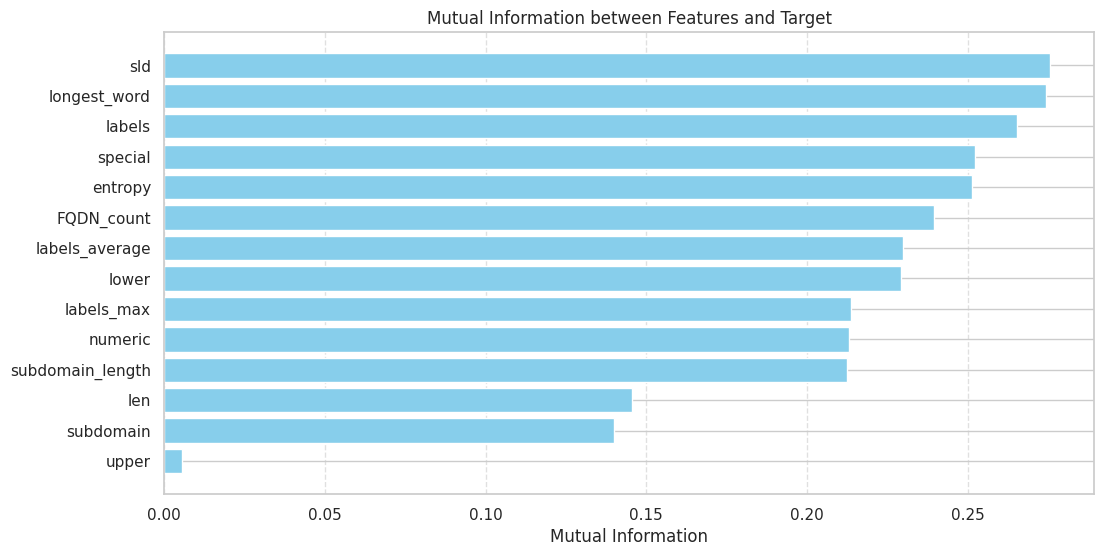

In [34]:
# Compute mutual information
mutual_info_values = mutual_info_classif(X, y)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': static_df.columns[:-1], 'Mutual_Info': mutual_info_values})

# Sort the DataFrame by mutual information values for better visualization
mi_df = mi_df.sort_values(by='Mutual_Info', ascending=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual_Info'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information between Features and Target')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


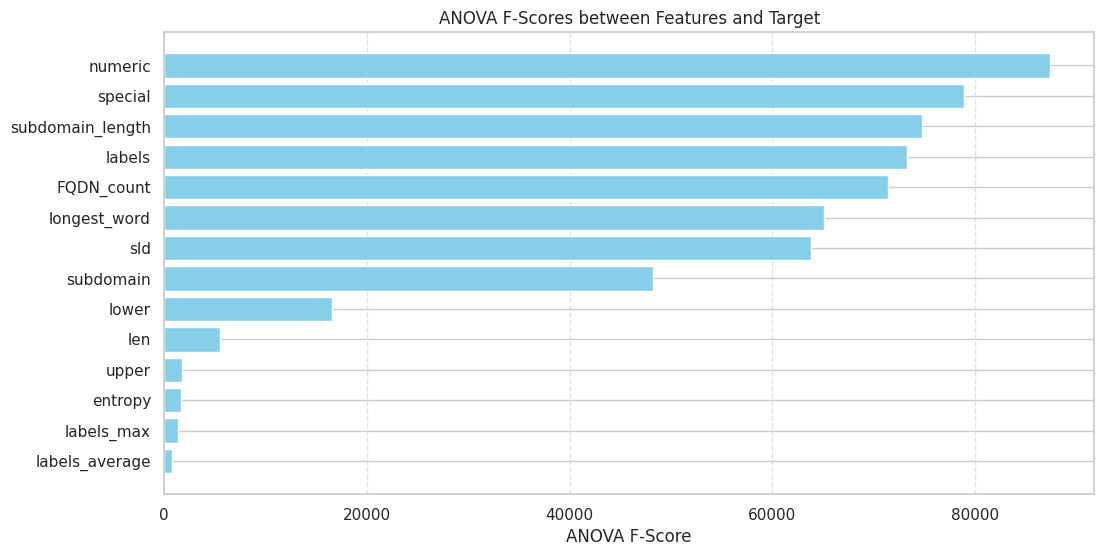

In [35]:
# Compute ANOVA F-scores
f_scores, _ = f_classif(X, y)

# Create a DataFrame for better visualization
anova_df = pd.DataFrame({'Feature': static_df.columns[:-1], 'F_Score': f_scores})

# Sort the DataFrame by F-scores for better visualization
anova_df = anova_df.sort_values(by='F_Score', ascending=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(anova_df['Feature'], anova_df['F_Score'], color='skyblue')
plt.xlabel('ANOVA F-Score')
plt.title('ANOVA F-Scores between Features and Target')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


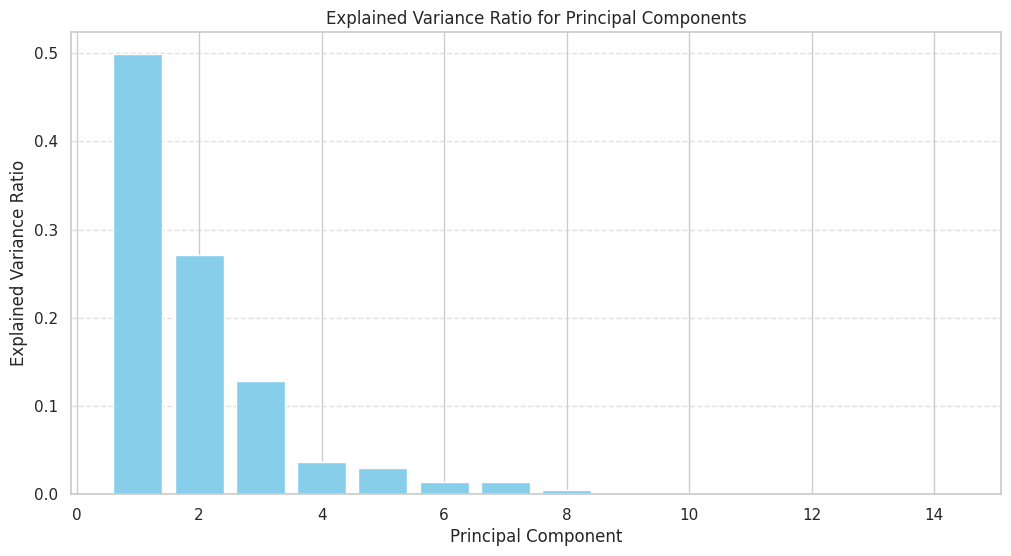

In [36]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame for better visualization
pca_df = pd.DataFrame({'Principal Component': range(1, len(explained_variance_ratio) + 1),
                       'Explained Variance Ratio': explained_variance_ratio})

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(pca_df['Principal Component'], pca_df['Explained Variance Ratio'], color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


## Model Training

In [37]:
X = static_df.drop(columns=['Target Attack'])
y = static_df['Target Attack']

# Normalize the features to be between 0 and 1
#scaler = MinMaxScaler()
#X_normalized = scaler.fit_transform(X)

#stratified sampling
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [38]:
pastel_palette = sns.color_palette('pastel')
model_results = {}
classifiers_scorces = {}

def Classifiers(classifier_name, X_Train, Y_Train, X_Test, Y_Test,model):
    val_results = {}
    # Classifiers: K Nearest Neighbors,Logistic Regression, Support Vector Machine,Decision Tree Classifier, , Gaussian Naive Bayes, Bernoulli Naive Bayes

    classifiers = {
        "K Nearest Neighbors": model,
        "Logistic Regression": model,
        "Support Vector Machine SVM": model,
        "Decision Tree Classifier": model,
        "Gaussian Naive Bayes": model
    }

    for clf_name, clf in classifiers.items():
      if(classifier_name== clf_name):
          print(f"{clf_name}")

          clf_model = clf.fit(X_Train, Y_Train)
          y_test_pred = clf_model.predict(X_Test)
          y_train_pred = clf_model.predict(X_Train)
          ##############################################################################################################
          # Confusion Matrix for Training and Testing
          cm_train = confusion_matrix(Y_Train, y_train_pred)
          cm_test = confusion_matrix(Y_Test, y_test_pred)

          # Visualize the confusion matrices using Seaborn
          fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

          sns.heatmap(cm_train, annot=True, cmap='Pastel2', ax=axs[0], fmt='g')
          axs[0].set_title(f"{clf_name} Training Confusion Matrix")
          axs[0].set_xlabel('Predicted Labels')
          axs[0].set_ylabel('Actual Labels')

          sns.heatmap(cm_test, annot=True, cmap='Pastel1', ax=axs[1], fmt='g')
          axs[1].set_title(f"{clf_name} Testing Confusion Matrix")
          axs[1].set_xlabel('Predicted Labels')
          axs[1].set_ylabel('Actual Labels')

          plt.tight_layout()
          plt.show()
          print("------------------------------------------------------------------------------------------------------")
          ##############################################################################################################

          # Classification Report for Training and Testing
          clf_report_Train = classification_report(Y_Train, y_train_pred)
          print(f"{clf_name} Training Classification Report:\n{clf_report_Train}")
          print("------------------------------------------------------------------------------------------------------")


          clf_report_Test = classification_report(Y_Test, y_test_pred)
          print(f"{clf_name} Testing Classification Report:\n{clf_report_Test}")
          print("------------------------------------------------------------------------------------------------------")

          ##############################################################################################################
          # Performance Metrics for Training and Testing
          acc_train = accuracy_score(Y_Train, y_train_pred) * 100
          pre_train = precision_score(Y_Train, y_train_pred, average='macro') * 100
          recall_train = recall_score(Y_Train, y_train_pred, average='macro') * 100
          f1_train = 2*(pre_train*recall_train)/(pre_train+recall_train)

          # Create DataFrame for training metrics
          metrics_train = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 score'],
                                        'Value': [acc_train, pre_train, recall_train, f1_train]})

          acc_test = accuracy_score(Y_Test, y_test_pred) * 100
          pre_test = precision_score(Y_Test, y_test_pred, average='macro') * 100
          recall_test = recall_score(Y_Test, y_test_pred, average='macro') * 100
          f1_test = 2*(pre_test*recall_test)/(pre_test+recall_test)

          # Create DataFrame for testing metrics
          metrics_test = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 score'],
                                      'Value': [acc_test, pre_test, recall_test, f1_test]})

          classifiers_scorces[clf_name] = [acc_test, pre_test, recall_test, f1_test]

          fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

          sns.barplot(x='Metric', y='Value', data=metrics_train, ax=axs[0], palette=pastel_palette)
          axs[0].set_title(f"{clf_name} Training Performance Metrics")
          axs[0].set_ylim(10, 100)  # Set Y-axis range from 10 to 100%
          axs[0].set_ylabel('Percentage (%)')

          for i, v in enumerate(metrics_train['Value']):
             axs[0].text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontweight='bold', fontsize=12)

          sns.barplot(x='Metric', y='Value', data=metrics_test, ax=axs[1], palette=pastel_palette)
          axs[1].set_title(f"{clf_name} Testing Performance Metrics")
          axs[1].set_ylim(10, 100)  # Set Y-axis range from 10 to 100%
          axs[1].set_ylabel('Percentage (%)')

          for i, v in enumerate(metrics_test['Value']):
              axs[1].text(i, v + 1,f"{v:.1f}%", ha='center', va='bottom', fontweight='bold', fontsize=12)

          plt.tight_layout()
          plt.show()

    ##############################################################################################################


K Nearest Neighbors


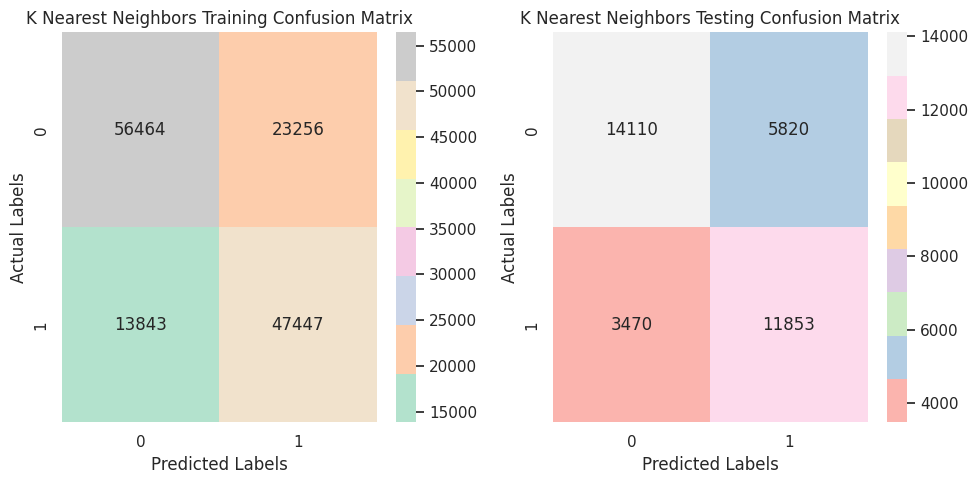

------------------------------------------------------------------------------------------------------
K Nearest Neighbors Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75     79720
           1       0.67      0.77      0.72     61290

    accuracy                           0.74    141010
   macro avg       0.74      0.74      0.74    141010
weighted avg       0.75      0.74      0.74    141010

------------------------------------------------------------------------------------------------------
K Nearest Neighbors Testing Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75     19930
           1       0.67      0.77      0.72     15323

    accuracy                           0.74     35253
   macro avg       0.74      0.74      0.74     35253
weighted avg       0.75      0.74      0.74     35253

-------------------------------------

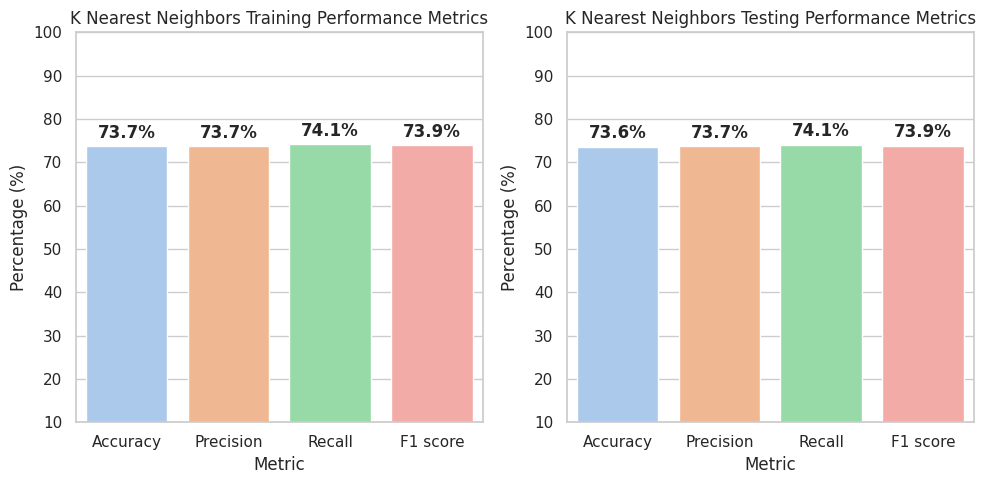

In [39]:
knn=KNeighborsClassifier()
Classifiers("K Nearest Neighbors",x_train,y_train, x_test, y_test,knn)

Logistic Regression


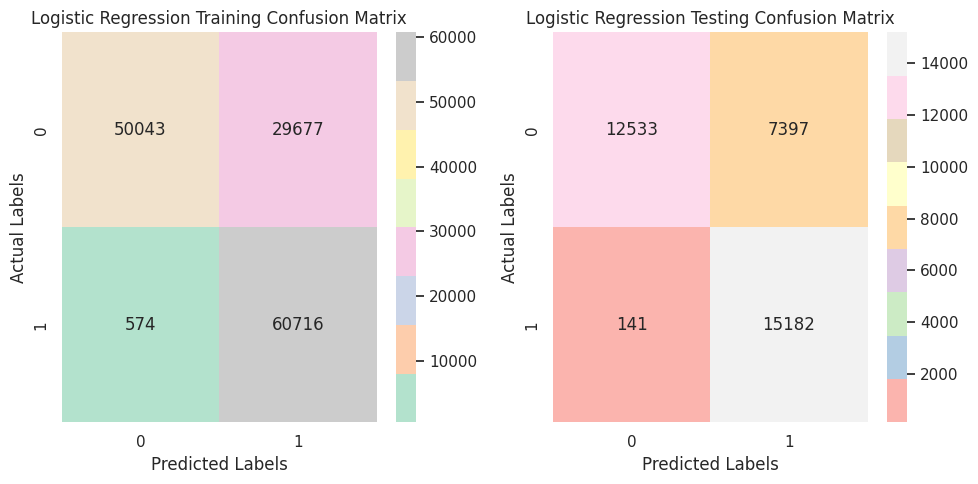

------------------------------------------------------------------------------------------------------
Logistic Regression Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.63      0.77     79720
           1       0.67      0.99      0.80     61290

    accuracy                           0.79    141010
   macro avg       0.83      0.81      0.78    141010
weighted avg       0.85      0.79      0.78    141010

------------------------------------------------------------------------------------------------------
Logistic Regression Testing Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.63      0.77     19930
           1       0.67      0.99      0.80     15323

    accuracy                           0.79     35253
   macro avg       0.83      0.81      0.78     35253
weighted avg       0.85      0.79      0.78     35253

-------------------------------------

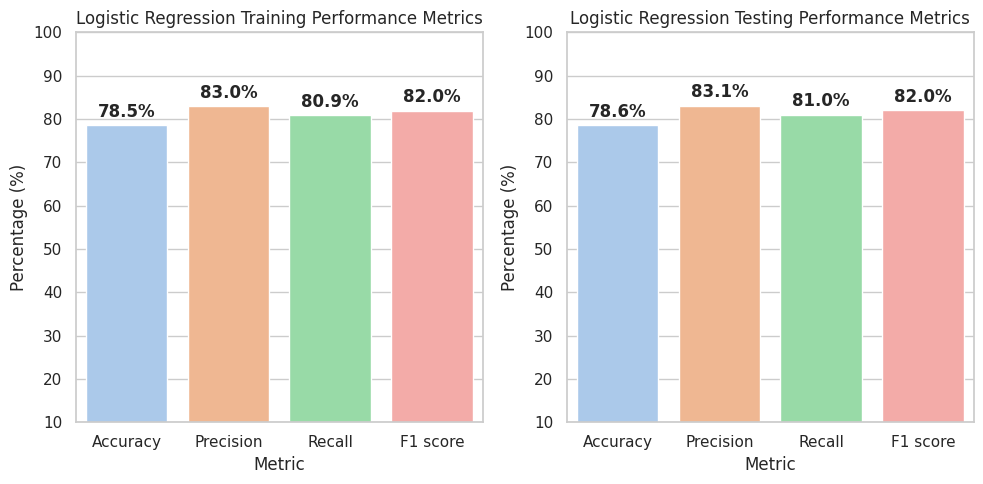

In [40]:
LR=LogisticRegression(max_iter=8000,random_state=42)
Classifiers( "Logistic Regression",x_train, y_train, x_test, y_test,LR)

Gaussian Naive Bayes


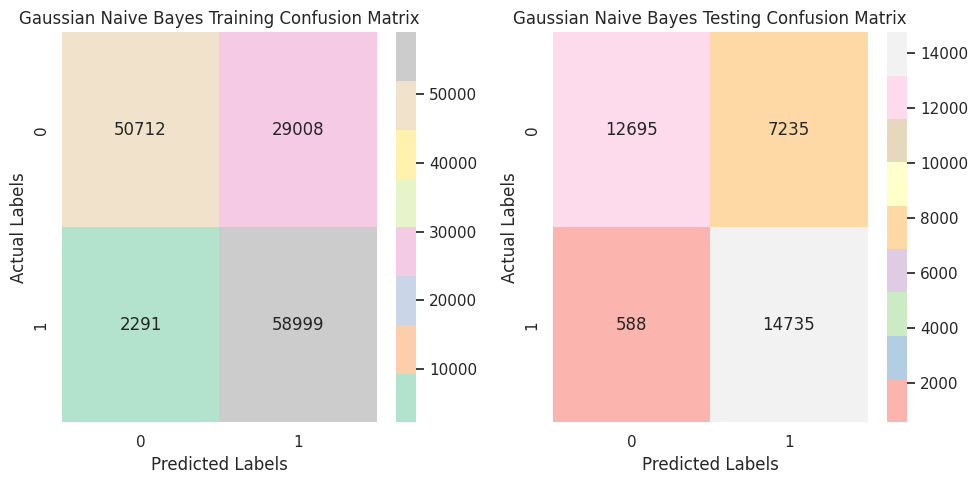

------------------------------------------------------------------------------------------------------
Gaussian Naive Bayes Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.76     79720
           1       0.67      0.96      0.79     61290

    accuracy                           0.78    141010
   macro avg       0.81      0.80      0.78    141010
weighted avg       0.83      0.78      0.78    141010

------------------------------------------------------------------------------------------------------
Gaussian Naive Bayes Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.64      0.76     19930
           1       0.67      0.96      0.79     15323

    accuracy                           0.78     35253
   macro avg       0.81      0.80      0.78     35253
weighted avg       0.83      0.78      0.78     35253

-----------------------------------

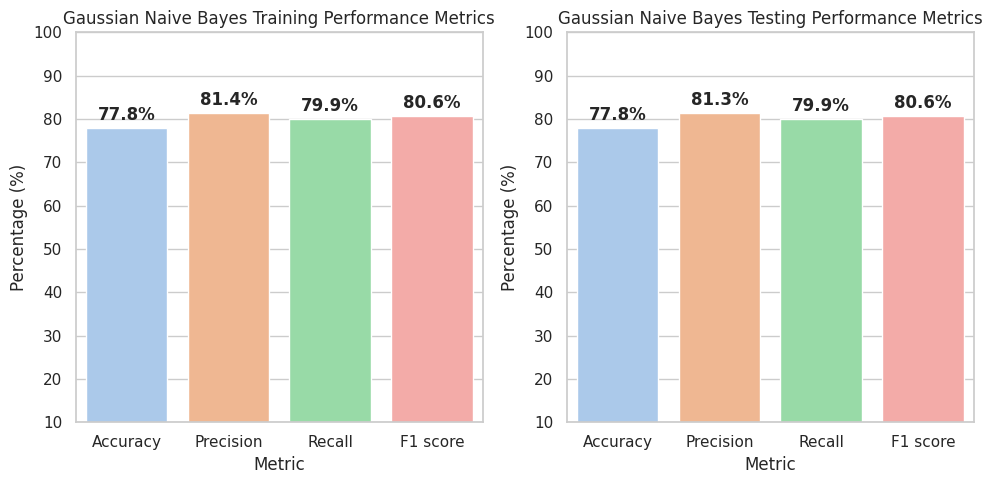

In [41]:
NB=GaussianNB()
Classifiers("Gaussian Naive Bayes",x_train,y_train, x_test, y_test,NB)

In [42]:
# SVM=SVC(kernel='linear', decision_function_shape='ovr', C=1)
# Classifiers("Support Vector Machine SVM",x_train, y_train, x_test, y_test,SVM)

Decision Tree Classifier


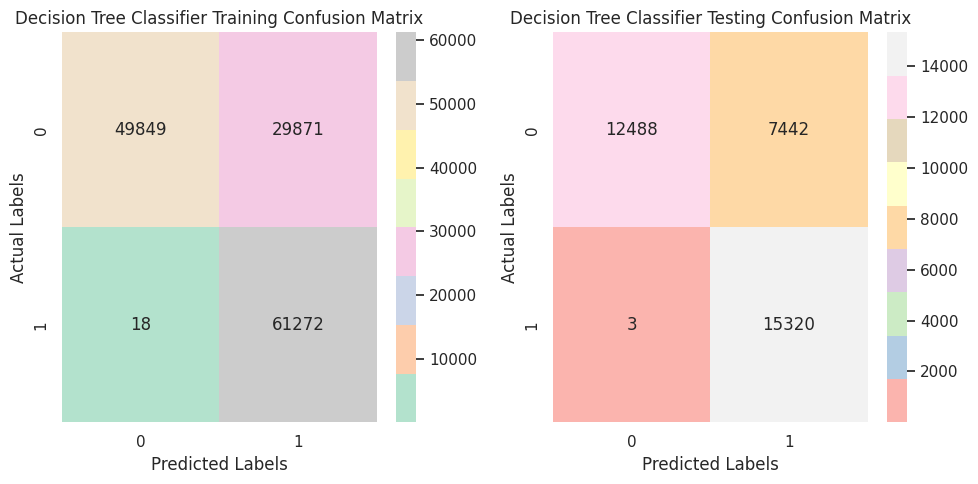

------------------------------------------------------------------------------------------------------
Decision Tree Classifier Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77     79720
           1       0.67      1.00      0.80     61290

    accuracy                           0.79    141010
   macro avg       0.84      0.81      0.79    141010
weighted avg       0.86      0.79      0.78    141010

------------------------------------------------------------------------------------------------------
Decision Tree Classifier Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77     19930
           1       0.67      1.00      0.80     15323

    accuracy                           0.79     35253
   macro avg       0.84      0.81      0.79     35253
weighted avg       0.86      0.79      0.79     35253

---------------------------

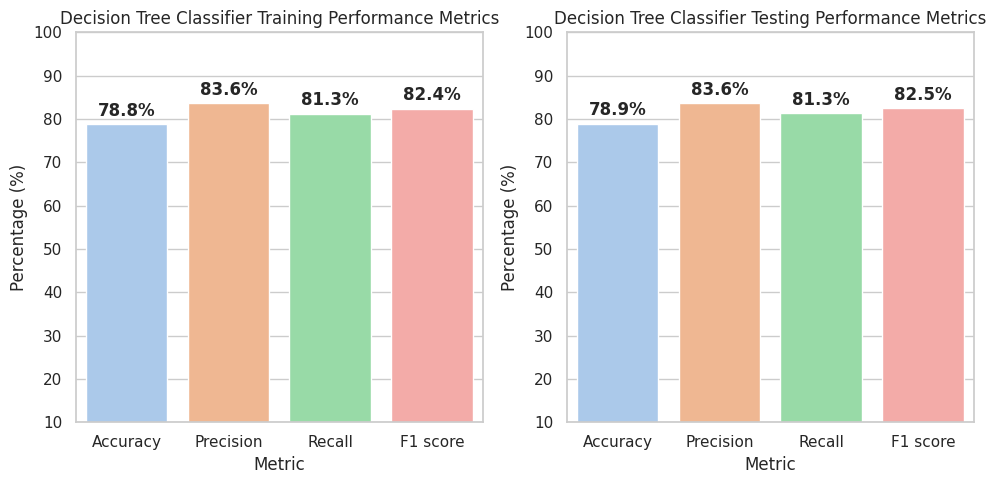

In [43]:
DT=DecisionTreeClassifier(random_state=42)
Classifiers("Decision Tree Classifier",x_train, y_train, x_test, y_test,DT)

In [44]:
#Model Evlations
metrics_df = pd.DataFrame(classifiers_scorces, index=['Accuracy', 'Precision', 'Recall', 'F1 score']).T
metrics_df_sorted = metrics_df.sort_values(by='F1 score', ascending=False)
column_order = ['Accuracy'] + [col for col in metrics_df_sorted.columns if col != 'Accuracy']

# Then, reindex the DataFrame with the specified column order
metrics_df_sorted = metrics_df_sorted.reindex(columns=column_order)
metrics_df_sorted.style.background_gradient(cmap='Blues')

,Accuracy,Precision,Recall,F1 score
Decision Tree Classifier,78.881230,83.640570,81.319865,82.463893
Logistic Regression,78.617423,83.063478,80.982456,82.009768
Gaussian Naive Bayes,77.808981,81.321010,79.930287,80.619651
K Nearest Neighbors,73.647633,73.665035,74.076048,73.869970


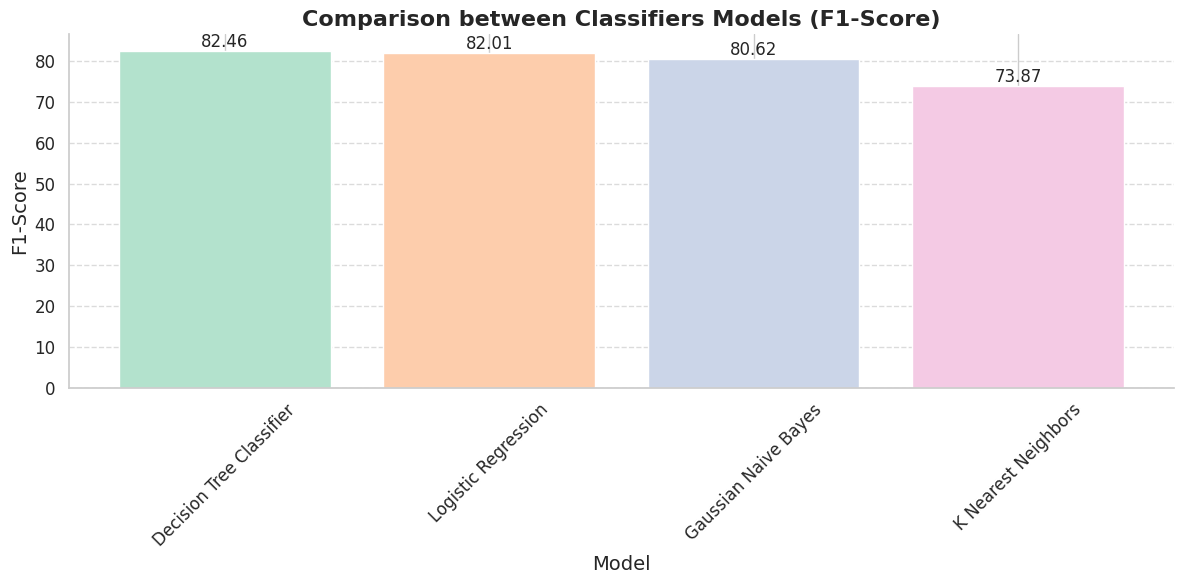

In [45]:
# Extract the F1 scores instead of accuracy
values = [classifiers_scorces[key][3] for key in classifiers_scorces]

# Extract the labels (names of the models)
labels = list(classifiers_scorces.keys())

# Sort the values and labels in descending order based on F1-score
sorted_indices = sorted(range(len(values)), key=lambda k: values[k], reverse=True)
values = [values[i] for i in sorted_indices]
labels = [labels[i] for i in sorted_indices]

# Plot the bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visualization
bars = plt.bar(labels, values, color=plt.cm.Pastel2.colors)

# Customize plot aesthetics
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)  # Change the ylabel to 'F1-Score'
plt.title('Comparison between Classifiers Models (F1-Score)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add data labels to the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Remove top and right spines, and set gridlines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust the spacing to prevent clipping of labels
plt.show()


## Compare 2 models with 3 different feature selection to choose the best one to fine tune it

### Information gain or Mutual Information

In [46]:
LR = {'Mutual Information': set() ,'Chi-Square': set() ,'ANOVA': set()}
DT = {'Mutual Information': set() ,'Chi-Square': set() ,'ANOVA': set()}

In [47]:
def Baseline (Train_x, Test_x,Range):
  Baseline_LR_Scores ={}
  Baseline_DT_Scores= {}
  for i in Range:
     #Before Apllying Dimensionality Reduction
     Baseline_LR_Scores[i],Baseline_DT_Scores[i]= F1_Score(Train_x, y_train, Test_x, y_test)
  return  Baseline_LR_Scores,Baseline_DT_Scores

In [48]:
def F1_Score(X_Train, Y_Train, X_Test, Y_Test):
    LR_clf = LogisticRegression(max_iter=8000, random_state=42)
    LR_clf.fit(X_Train, Y_Train)
    y_LR_pred = LR_clf.predict(X_Test)
    LR_score = f1_score(Y_Test, y_LR_pred) * 100  # Replace accuracy_score with f1_score

    # Decision Tree Classifier
    DT_clf = DecisionTreeClassifier(random_state=42)
    DT_clf.fit(X_Train, Y_Train)
    y_DT_pred = DT_clf.predict(X_Test)
    DT_score = f1_score(Y_Test, y_DT_pred) * 100  # Replace accuracy_score with f1_score

    return LR_score, DT_score

In [49]:
def Feature_Select(X_train, y_train, X_test, y_test, FSM, model):
  fs = FSM
  fs.fit(X_train, y_train)
  X_train_new = fs.transform(X_train)
  X_test_new = fs.transform(X_test)
  model.fit(X_train_new, y_train)
  y_pred = model.predict(X_test_new)
  acc = f1_score(y_test, y_pred) * 100

  return acc

In [50]:
#Filter Methods Function
def Fliter_DR(train_X, train_Y, test_X, test_Y ,fm,fm_name):

  LR_F1_Score_FS= {}
  DT_F1_Score_FS = {}

  for i in range(2, 13):

    #apply fliter reducation
    if fm_name == 'Variance Threshold':
      fsm = VarianceThreshold(threshold=i)

    else:
      fsm =  SelectKBest(fm, k=i)

    LR_F1_Score_FS[i] =  Feature_Select (train_X, train_Y, test_X, test_Y, fsm,LogisticRegression(max_iter=8000,random_state=42))
    DT_F1_Score_FS[i] =  Feature_Select (train_X, train_Y, test_X, test_Y, fsm,DecisionTreeClassifier(random_state=42))

    LR[fm_name].add((i, LR_F1_Score_FS[i]))
    DT[fm_name].add((i, DT_F1_Score_FS[i]))

  return LR_F1_Score_FS,DT_F1_Score_FS

In [51]:
def Max (LR_Scores ,DT_Scores,LR_name, DT_name):

    # Find the maximum X score for Naive Bayes
    max_LR = max(LR_Scores.values())
    best_LR= max(LR_Scores, key=LR_Scores.get)
    print()
    print(f"Maximum of {LR_name}: {max_LR}")
    print(f"Best number of n_components {LR_name}: {best_LR}")
    print()

    # Find the maximum X score for K-Nearest Neighbors
    max_DT = max(DT_Scores.values())
    best_DT = max(DT_Scores, key=DT_Scores.get)
    print(f"Maximum of {DT_name}:",max_DT )
    print(f"Best number of n_components {DT_name}:", best_DT)
    print()

    return best_LR,max_LR,best_DT,max_DT

In [52]:
def draw_plots(LR_Scores, DT_Scores, Baseline_LR_Scores, Baseline_DT_Scores, LR_name, DT_name, RD_range, RD_label):
    RD_range_ = RD_range

    best_LR, max_LR, best_DT, max_DT = Max(LR_Scores, DT_Scores, LR_name, DT_name)

    # Create figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].grid()
    axs[0].plot(RD_range_, LR_Scores.values(), 'bx-', label=RD_label, color='Purple')
    axs[0].set_xticks(RD_range_)

    # Plot the maximum X score point in black
    axs[0].plot(best_LR, max_LR, marker='o', markersize=8, color='black')
    # Plot the X score for Naive Bayes with actual features
    axs[0].plot(RD_range_, Baseline_LR_Scores.values(), label='Baseline', linestyle='--', color='y')

    axs[0].legend()
    axs[0].set_xlabel('Number of Components')
    axs[0].set_ylabel('F1 Scores')  # Change ylabel to 'F1 Scores'
    axs[0].set_title(LR_name)

    axs[1].grid()
    axs[1].plot(RD_range_, DT_Scores.values(), 'bx-', label=RD_label, color='Purple')

    # Plot the maximum X score point in black
    axs[1].plot(best_DT, max_DT, marker='o', markersize=8, color='black')
    # Plot the X score for K-Nearest Neighbors with actual features
    axs[1].plot(RD_range_, Baseline_DT_Scores.values(), label='Baseline', linestyle='--', color='y')
    axs[1].set_xticks(RD_range_)

    axs[1].legend()
    axs[1].set_xlabel('Number of Components')
    axs[1].set_ylabel('F1 Scores')  # Change ylabel to 'F1 Scores'
    axs[1].set_title(DT_name)
    plt.show()

    return best_LR, max_LR, best_DT, max_DT

In [53]:
Baseline_LR_Scores,Baseline_DT_Scores=Baseline (x_train,x_test,range(2,13))

In [54]:
Baseline_LR_Scores

{2: 80.11186744762809,
 3: 80.11186744762809,
 4: 80.11186744762809,
 5: 80.11186744762809,
 6: 80.11186744762809,
 7: 80.11186744762809,
 8: 80.11186744762809,
 9: 80.11186744762809,
 10: 80.11186744762809,
 11: 80.11186744762809,
 12: 80.11186744762809}


Maximum of Information-Gain Logistic Regression: 80.23163990523823
Best number of n_components Information-Gain Logistic Regression: 11

Maximum of Information-Gain Decision Tree Classifier: 80.45681281176162
Best number of n_components Information-Gain Decision Tree Classifier: 2



<ipython-input-52-497c8951438e>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, LR_Scores.values(), 'bx-', label=RD_label, color='Purple')
<ipython-input-52-497c8951438e>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, DT_Scores.values(), 'bx-', label=RD_label, color='Purple')


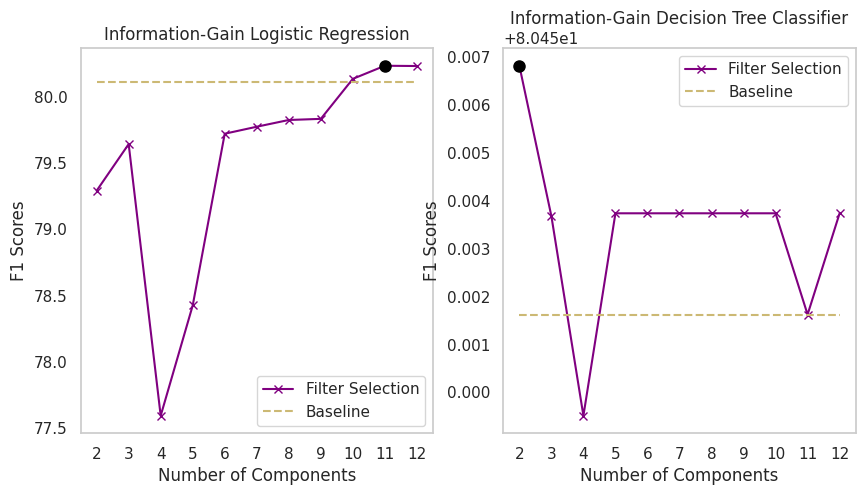

In [55]:
Baseline_LR_Scores,Baseline_DT_Scores=Baseline (x_train,x_test,range(2,13))
LR_F1_Scores_MI,DT_F1_Scores_MI= Fliter_DR(x_train, y_train,x_test, y_test,mutual_info_classif,'Mutual Information')
IG_LR_N, IG_LR_value, IG_DT_N ,IG_DT_value =draw_plots(LR_F1_Scores_MI,DT_F1_Scores_MI,Baseline_LR_Scores,Baseline_DT_Scores,'Information-Gain Logistic Regression','Information-Gain Decision Tree Classifier',range(2, 13),'Filter Selection')

### Chi-Square


Maximum of Chi-Square-Logistic_Regression: 80.24431339511374
Best number of n_components Chi-Square-Logistic_Regression: 7

Maximum of Chi-Square-Decision Tree Classifier: 80.46001155280155
Best number of n_components Chi-Square-Decision Tree Classifier: 5



<ipython-input-52-497c8951438e>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, LR_Scores.values(), 'bx-', label=RD_label, color='Purple')
<ipython-input-52-497c8951438e>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, DT_Scores.values(), 'bx-', label=RD_label, color='Purple')


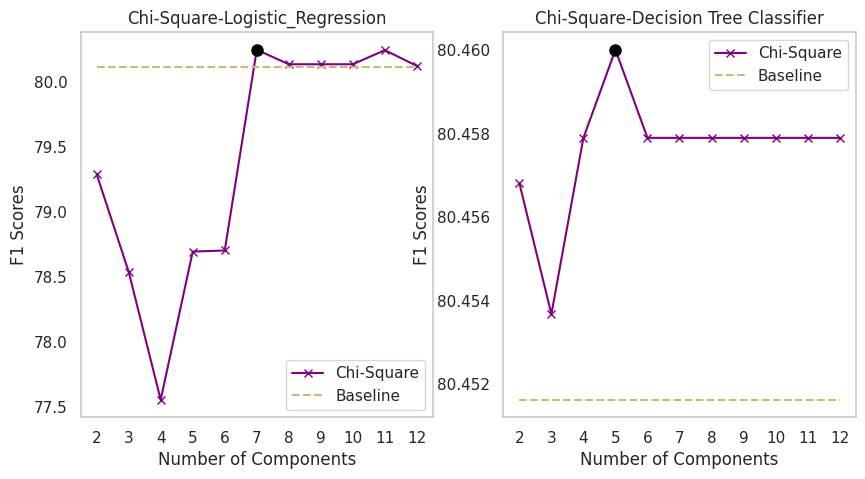

In [56]:
Baseline_LR_Scores,Baseline_DT_Scores=Baseline(x_train,x_test,range(2,13))
LR_F1_Scores_chi2,DT_F1_Scores_chi2= Fliter_DR(x_train, y_train,x_test, y_test,chi2,'Chi-Square')
CS_LR_N, CS_LR_value, CS_DT_N ,CS_DT_value =draw_plots(LR_F1_Scores_chi2,DT_F1_Scores_chi2,Baseline_LR_Scores,Baseline_DT_Scores,'Chi-Square-Logistic_Regression','Chi-Square-Decision Tree Classifier',range(2, 13),'Chi-Square')

### ANOVA


Maximum of ANOVA-Logistic-Regression: 80.24112877750869
Best number of n_components ANOVA-Logistic-Regression: 10

Maximum of ANOVA-Decision Tree Classifier: 80.45789902066322
Best number of n_components ANOVA-Decision Tree Classifier: 7



<ipython-input-52-497c8951438e>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(RD_range_, LR_Scores.values(), 'bx-', label=RD_label, color='Purple')
<ipython-input-52-497c8951438e>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(RD_range_, DT_Scores.values(), 'bx-', label=RD_label, color='Purple')


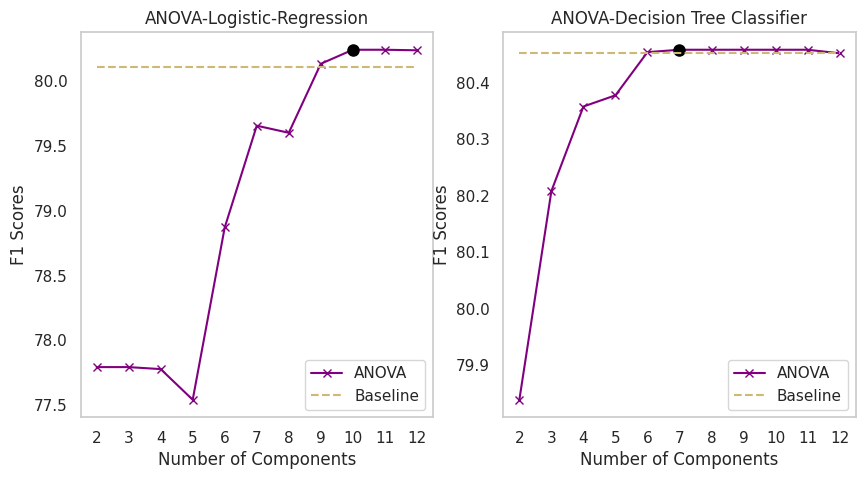

In [57]:
Baseline_LR_Scores,Baseline_DT_Scores=Baseline (x_train,x_test,range(2,13))
LR_F1_Scores_FS,DT_F1_Scores_FS= Fliter_DR(x_train, y_train,x_test, y_test,f_classif,'ANOVA')
FS_LR_N, FS_LR_value, FS_DT_N ,FS_DT_value =draw_plots(LR_F1_Scores_FS,DT_F1_Scores_FS,Baseline_LR_Scores,Baseline_DT_Scores,'ANOVA-Logistic-Regression','ANOVA-Decision Tree Classifier',range(2, 13),'ANOVA')

Best Dimensionality Reduction method in Filter Methods




In [58]:
# Determine the maximum value and its corresponding information
F_max_value = max(IG_LR_value, IG_DT_value,CS_LR_value, CS_DT_value, FS_LR_value, FS_DT_value)

# Check which variable has the maximum value
if F_max_value == IG_LR_value:
    F_max_N = IG_LR_N
    F_max_name = 'Information Gain_LR'
elif F_max_value == IG_DT_value:
    F_max_N = IG_DT_N
    F_max_name = 'Information Gain_DT'
elif F_max_value == CS_LR_value:
    F_max_N = CS_LR_N
    F_max_name = 'Chi-Square_LR'
elif F_max_value == CS_DT_value:
    F_max_N = CS_DT_N
    F_max_name = 'Chi-Square_DT'
elif F_max_value == FS_LR_value:
    F_max_N = FS_LR_N
    F_max_name = 'ANOVA_LR'
elif F_max_value == FS_DT_value:
    F_max_N = FS_DT_N
    F_max_name = 'ANOVA_DT'

# Check if the maximum value corresponds to knn or DT
if 'knn' in F_max_name:
    print(f"Best Method in Logistic Regression(LR) is: {F_max_name}")
else:
    print(f"Best Method in Decision Tree Classifier is {F_max_name}")

# Print the maximum value and corresponding information
print("Maximum value:", F_max_value)
print("Corresponding N:",F_max_N)
print("Corresponding Name:", F_max_name)


Best Method in Decision Tree Classifier is Chi-Square_DT
Maximum value: 80.46001155280155
Corresponding N: 5
Corresponding Name: Chi-Square_DT


## Apply Models With best K

In [59]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [60]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

# Assuming X_train, X_test are your training and testing sets
def select_BestK_Different_Feature_Selection(classif,k1):
    # SelectKBest with the best number of features for Decision Tree Classifier
    tree_best_features = SelectKBest(classif, k=k1).fit(x_train, y_train)
    feature_scores = tree_best_features.scores_
    selected_feature_names = x_train.columns[tree_best_features.get_support()]
    X_train_selected_features_mutual_information_tree_df=x_train[selected_feature_names]
    X_test_selected_features_mutual_information_tree_df=x_test[selected_feature_names]
    return X_train_selected_features_mutual_information_tree_df,X_test_selected_features_mutual_information_tree_df


In [61]:
X_train_selected_features_chi2_tree_df,X_test_selected_features_chi2_tree_df=select_BestK_Different_Feature_Selection(chi2,5)

## Apply Hyper Parameter tunning on the best Model

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree Classifier
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,0,1,2,3,4,5],
    'min_samples_split': [0,1,2,3,4],
    'min_samples_leaf': [0,1, 2,3, 4]
}

# Create the Decision Tree model with best features
best_tree_model = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object for Decision Tree Classifier
tree_grid_search = GridSearchCV(best_tree_model, param_grid=tree_param_grid, cv=2, scoring='f1')

# Fit the grid search to the data
tree_grid_search.fit(X_train_selected_features_chi2_tree_df, y_train)

# Get the best hyperparameters for Decision Tree Classifier
best_tree_params = tree_grid_search.best_params_

# Train the final Decision Tree Classifier model with the best hyperparameters
final_tree_model = DecisionTreeClassifier(**best_tree_params, random_state=42)
#final_tree_model.fit(X_train_tree_selected, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
412 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

In [63]:
best_tree_params

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

Decision Tree Classifier


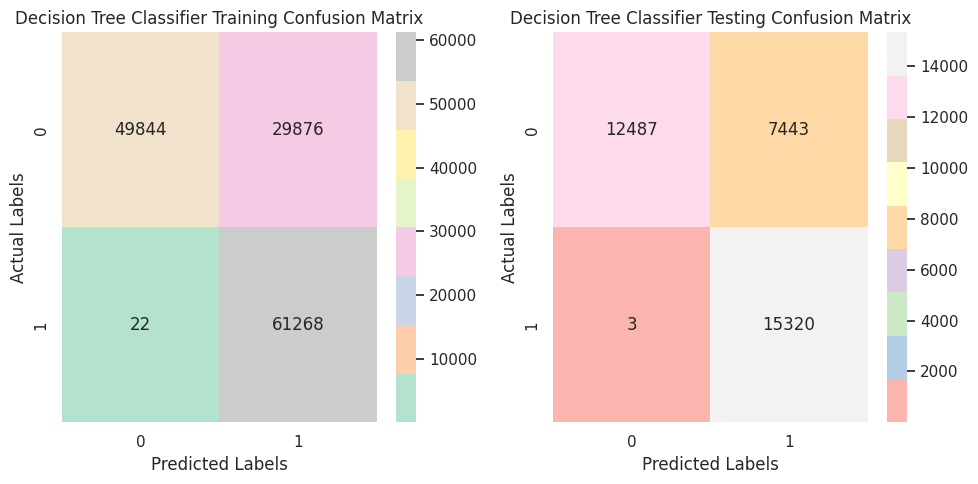

------------------------------------------------------------------------------------------------------
Decision Tree Classifier Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77     79720
           1       0.67      1.00      0.80     61290

    accuracy                           0.79    141010
   macro avg       0.84      0.81      0.79    141010
weighted avg       0.86      0.79      0.78    141010

------------------------------------------------------------------------------------------------------
Decision Tree Classifier Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77     19930
           1       0.67      1.00      0.80     15323

    accuracy                           0.79     35253
   macro avg       0.84      0.81      0.79     35253
weighted avg       0.86      0.79      0.79     35253

---------------------------

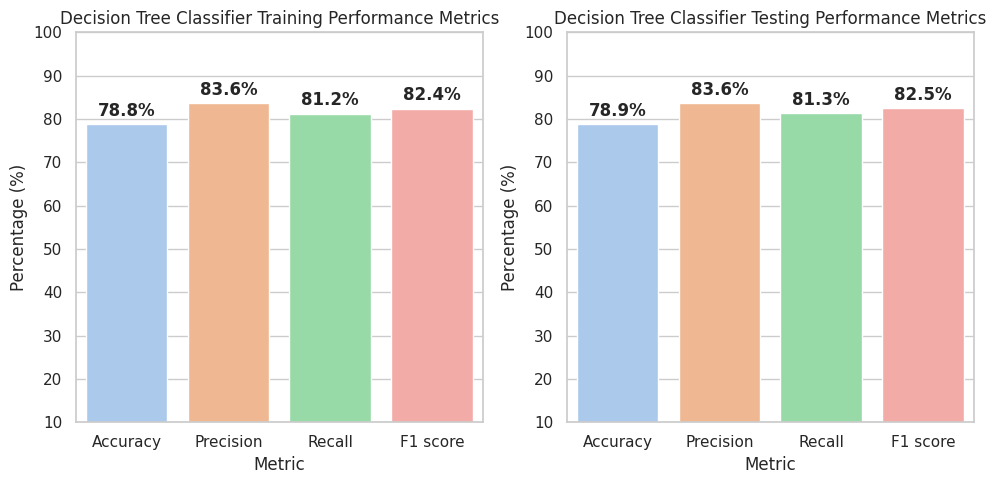

In [64]:
Classifiers("Decision Tree Classifier",X_train_selected_features_chi2_tree_df, y_train, X_test_selected_features_chi2_tree_df, y_test,final_tree_model)

## PipeLine

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Assuming x_train is your training data

# Define the feature selection method (mutual info with k=5)
feature_selection = SelectKBest(chi2, k=5)

# Define the Random Forest classifier
rf_classifier = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=2)


# Create the pipeline with feature selection and the Random Forest classifier
pipeline = Pipeline([
    ('feature_selection', feature_selection),
    ('classifier', rf_classifier)
])

# Fit the pipeline to the normalized training data
pipeline.fit(x_train, y_train)


Pipeline(steps=[('feature_selection',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x78a6f1dfed40>)),
                ('classifier',
                 DecisionTreeClassifier(min_samples_leaf=2, random_state=42))])

In [69]:
import pickle
#
model_filename = 'ch2_dt_model.pkl'

pickle.dump(pipeline, open(model_filename, 'wb'))
print(f"Model fitted and saved as {model_filename}")

Model fitted and saved as ch2_dt_model.pkl


In [70]:
xx=pickle.load(open('ch2_dt_model.pkl', 'rb'))